In [12]:
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

import dijkstra as dijk
import stacked_graph as sg
import testing as test
import graph_visualization as gv

In [13]:

# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(read_json_path)  as json_file:
    raw_json = json.load(json_file) # returns json file as dict

graph = sg.StackedGraph(raw_json=raw_json)

In [14]:
groups = list(graph.get_node_groups(ASAP = False))
print(test.group_validate(graph, groups))
for group in groups:
    print(group)


True
[55, 53, 56]
[56, 57, 59, 61, 62, 63]
[63, 65, 66, 68, 69, 70]
[70, 72, 74, 86, 88, 75, 89, 77, 90, 78, 91, 79, 92, 80, 104, 94, 81, 106, 95, 83, 107, 96, 84, 108, 97, 109, 98, 110, 100, 111, 101, 112, 102, 113, 114, 115, 116, 117, 119, 120, 121, 122]
[122, 123, 124]
[124, 126, 127, 129, 130, 131]
[131, 133, 135, 136, 138, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 153, 154]
[154, 155, 156]
[156, 158, 159, 161, 162, 163]
[163, 165, 167, 179, 181, 168, 182, 170, 183, 171, 184, 172, 185, 173, 196, 187, 174, 198, 188, 176, 199, 189, 177, 200, 190, 201, 191, 202, 192, 203, 193, 204, 194, 205, 206, 207, 208, 209, 211, 212, 213, 214]
[214, 215, 216]
[216, 218, 219, 221, 222, 223]
[223, 225, 227, 228, 230, 231, 232, 234, 235, 237, 238, 240, 241, 243, 244, 245, 246]
[246, 247, 248]
[248, 250, 251, 253, 254, 255]
[255, 257, 259, 271, 273, 260, 274, 262, 275, 263, 276, 264, 277, 265, 288, 279, 266, 290, 280, 268, 291, 281, 269, 292, 282, 293, 283, 294, 284, 295, 285, 296, 286, 297, 2

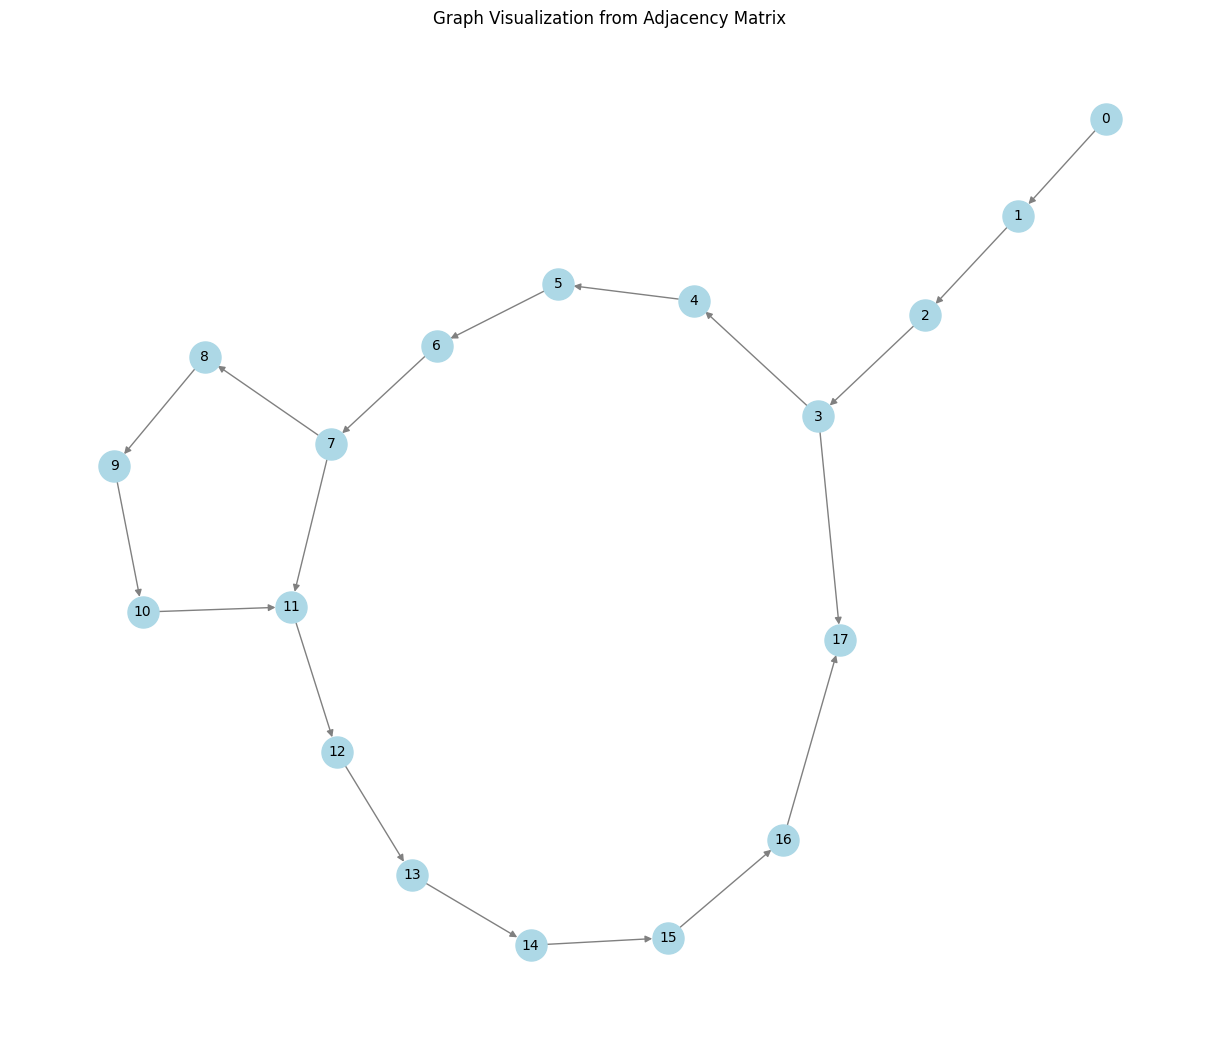

In [16]:
for i in range(len(groups)):
    if i == 6:
        test_group = groups[i]

        start_stack = sg.StackedNode(0, [], [[]], [[]], opp='start', func_stack=['start'], cost_stack=[0])
        first_stack = copy.deepcopy(graph.stack_list[graph.id_to_idx[test_group[0]]])
        first_stack.parents = [0]

        subgraph_stack_list = [start_stack, first_stack]
        for stack_id in test_group[1:]:
            stack = graph.stack_list[graph.id_to_idx[stack_id]]
            new_node = copy.deepcopy(stack)
            new_node.parents = set(new_node.parents) - graph.load_nodes
            subgraph_stack_list.append(new_node)


        new_graph = sg.StackedGraph(stack_list=subgraph_stack_list)
        # gv.adj_to_graph(new_graph.adj_matrix, save=False, layout = 'spectral')
        gv.adj_to_graph(new_graph.adj_matrix, save=False, layout = 'kk')